In [21]:
import numpy as np
import pandas as pd

In [22]:
df = pd.read_csv('Social_Network_Ads.csv')

In [23]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [24]:
df = df.iloc[:,2:]
df.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [25]:
import seaborn as sns

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age', ylabel='EstimatedSalary'>

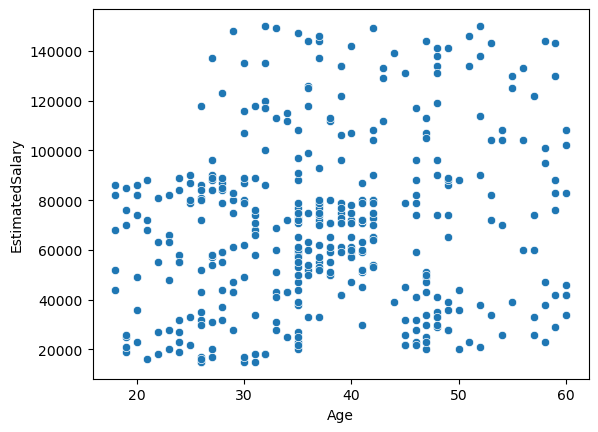

In [26]:
sns.scatterplot(df.iloc[:,0],df.iloc[:,1])

In [27]:
X = df.iloc[:,0:2]
y = df.iloc[:,-1]

In [28]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [29]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

In [30]:
model = Sequential()

model.add(Dense(128,activation='relu',input_dim=2))
model.add(Dense(1,activation='sigmoid'))

In [31]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 128)               384       
                                                                 
 dense_5 (Dense)             (None, 1)                 129       
                                                                 
Total params: 513 (2.00 KB)
Trainable params: 513 (2.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [32]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [33]:
history = model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100)

Epoch 1/100
10/10 [==============================] - 1s 18ms/step - loss: 1610.9358 - accuracy: 0.6344 - val_loss: 550.8093 - val_accuracy: 0.4000
Epoch 2/100
10/10 [==============================] - 0s 5ms/step - loss: 539.7084 - accuracy: 0.3844 - val_loss: 509.4301 - val_accuracy: 0.6000
Epoch 3/100
10/10 [==============================] - 0s 5ms/step - loss: 332.2248 - accuracy: 0.5969 - val_loss: 336.5424 - val_accuracy: 0.4000
Epoch 4/100
10/10 [==============================] - 0s 5ms/step - loss: 198.5105 - accuracy: 0.4969 - val_loss: 15.6081 - val_accuracy: 0.4000
Epoch 5/100
10/10 [==============================] - 0s 5ms/step - loss: 62.5480 - accuracy: 0.4594 - val_loss: 5.6492 - val_accuracy: 0.4000
Epoch 6/100
10/10 [==============================] - 0s 6ms/step - loss: 69.7940 - accuracy: 0.4844 - val_loss: 18.3985 - val_accuracy: 0.6000
Epoch 7/100
10/10 [==============================] - 0s 5ms/step - loss: 22.8333 - accuracy: 0.4812 - val_loss: 85.4314 - val_accuracy

Epoch 58/100
10/10 [==============================] - 0s 5ms/step - loss: 136.9986 - accuracy: 0.5156 - val_loss: 122.4963 - val_accuracy: 0.6000
Epoch 59/100
10/10 [==============================] - 0s 6ms/step - loss: 107.4069 - accuracy: 0.5656 - val_loss: 15.0523 - val_accuracy: 0.4000
Epoch 60/100
10/10 [==============================] - 0s 5ms/step - loss: 151.7500 - accuracy: 0.5406 - val_loss: 107.1997 - val_accuracy: 0.4000
Epoch 61/100
10/10 [==============================] - 0s 5ms/step - loss: 38.9384 - accuracy: 0.5219 - val_loss: 64.6642 - val_accuracy: 0.4000
Epoch 62/100
10/10 [==============================] - 0s 5ms/step - loss: 44.2739 - accuracy: 0.5156 - val_loss: 39.6926 - val_accuracy: 0.6000
Epoch 63/100
10/10 [==============================] - 0s 5ms/step - loss: 38.1592 - accuracy: 0.5156 - val_loss: 14.2012 - val_accuracy: 0.4000
Epoch 64/100
10/10 [==============================] - 0s 5ms/step - loss: 71.9609 - accuracy: 0.5281 - val_loss: 35.8315 - val_accu

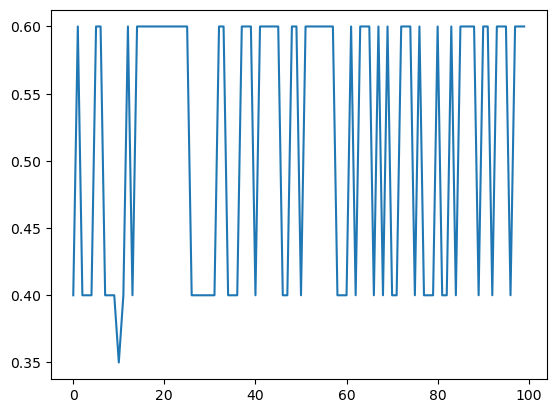

In [34]:
import matplotlib.pyplot as plt
plt.plot(history.history['val_accuracy'])


# Applying scaling

In [35]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [36]:
X_train_scaled

array([[ 0.88928823, -0.65924556],
       [-0.17254846,  0.87392651],
       [-1.04132394, -0.36440478],
       [ 0.98581884,  0.6085698 ],
       [-0.94479333,  0.57908572],
       [ 0.40663519,  0.01888824],
       [ 0.98581884,  2.11225779],
       [ 0.31010458, -0.30543662],
       [ 1.7580637 , -0.27595254],
       [-0.17254846,  2.20071003],
       [ 1.7580637 ,  1.0213469 ],
       [-1.33091576, -1.48479975],
       [ 2.04765553,  0.54960165],
       [ 1.27541066,  1.90586924],
       [-1.13785454,  0.31372902],
       [-0.36560968, -0.77718187],
       [-1.71703819,  0.49063349],
       [-0.5586709 , -1.51428383],
       [ 0.31010458, -0.71821372],
       [ 0.02051275, -0.57079333],
       [ 0.02051275,  0.04837232],
       [-0.07601785, -0.51182517],
       [-0.6552015 , -1.51428383],
       [ 0.02051275,  0.31372902],
       [ 0.31010458,  0.07785639],
       [-0.46214029, -1.13099081],
       [-0.75173211, -1.54376791],
       [-0.26907907, -0.65924556],
       [-1.13785454,

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

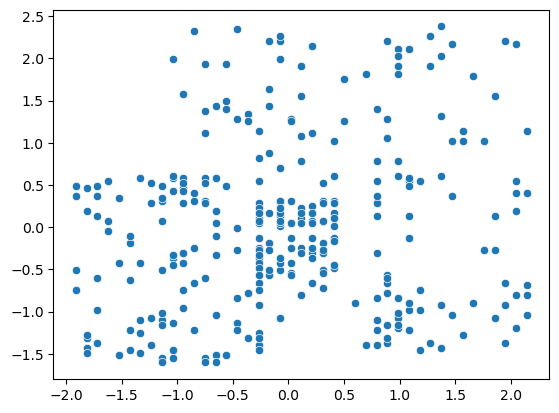

In [37]:
sns.scatterplot(X_train_scaled[:,0],X_train_scaled[:,1])

In [38]:
model = Sequential()

model.add(Dense(128,activation='relu',input_dim=2))
model.add(Dense(1,activation='sigmoid'))

model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

history = model.fit(X_train_scaled,y_train,validation_data=(X_test_scaled,y_test),epochs=100)

Epoch 1/100
10/10 [==============================] - 1s 16ms/step - loss: 0.6921 - accuracy: 0.4656 - val_loss: 0.6481 - val_accuracy: 0.7375
Epoch 2/100
10/10 [==============================] - 0s 5ms/step - loss: 0.6341 - accuracy: 0.7500 - val_loss: 0.5927 - val_accuracy: 0.8500
Epoch 3/100
10/10 [==============================] - 0s 5ms/step - loss: 0.5873 - accuracy: 0.8188 - val_loss: 0.5458 - val_accuracy: 0.8625
Epoch 4/100
10/10 [==============================] - 0s 5ms/step - loss: 0.5466 - accuracy: 0.8313 - val_loss: 0.5072 - val_accuracy: 0.8625
Epoch 5/100
10/10 [==============================] - 0s 5ms/step - loss: 0.5128 - accuracy: 0.8500 - val_loss: 0.4745 - val_accuracy: 0.8375
Epoch 6/100
10/10 [==============================] - 0s 5ms/step - loss: 0.4834 - accuracy: 0.8562 - val_loss: 0.4466 - val_accuracy: 0.8125
Epoch 7/100
10/10 [==============================] - 0s 5ms/step - loss: 0.4575 - accuracy: 0.8531 - val_loss: 0.4227 - val_accuracy: 0.8125
Epoch 8/100


Epoch 59/100
10/10 [==============================] - 0s 5ms/step - loss: 0.2375 - accuracy: 0.9062 - val_loss: 0.2656 - val_accuracy: 0.9125
Epoch 60/100
10/10 [==============================] - 0s 5ms/step - loss: 0.2387 - accuracy: 0.9031 - val_loss: 0.2614 - val_accuracy: 0.9125
Epoch 61/100
10/10 [==============================] - 0s 5ms/step - loss: 0.2368 - accuracy: 0.9062 - val_loss: 0.2634 - val_accuracy: 0.9250
Epoch 62/100
10/10 [==============================] - 0s 5ms/step - loss: 0.2369 - accuracy: 0.9062 - val_loss: 0.2637 - val_accuracy: 0.9250
Epoch 63/100
10/10 [==============================] - 0s 5ms/step - loss: 0.2362 - accuracy: 0.9062 - val_loss: 0.2597 - val_accuracy: 0.9375
Epoch 64/100
10/10 [==============================] - 0s 6ms/step - loss: 0.2354 - accuracy: 0.9031 - val_loss: 0.2595 - val_accuracy: 0.9250
Epoch 65/100
10/10 [==============================] - 0s 5ms/step - loss: 0.2352 - accuracy: 0.9031 - val_loss: 0.2594 - val_accuracy: 0.9375
Epoch 

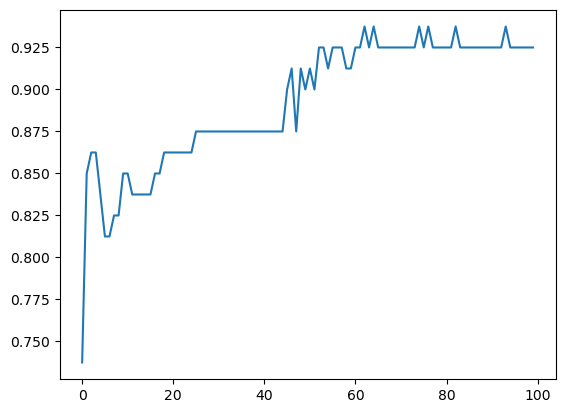

In [39]:
import matplotlib.pyplot as plt
plt.plot(history.history['val_accuracy'])